<a href="https://colab.research.google.com/github/KhoiriPutraMujiza/Pembelajaran-Mesin_Khoiri-Putra-Mujiza_2211537001/blob/main/Praktikum_ML_Pekan_3_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import library yang dibutuhkan

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist,pdist
from sklearn.preprocessing import RobustScaler

1. import warnings Fungsi: Library untuk menangani peringatan di Python.
2. Fungsi cdist dan pdist dari SciPy digunakan untuk menghitung jarak antara titik dalam ruang multidimensi.
3. RobustScaler adalah alat prapemrosesan data yang menstandarkan fitur dengan menghilangkan median dan menskalakan data sesuai dengan rentang kuartil (IQR).

In [ ]:
#Load dataset dan menampilkannya

data = pd.read_csv('Credit Card Customer Data.csv')
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


Membaca dataset

In [ ]:
#Mendefinisikan X adalah Avg_Credit_Limit dan Total_Credit_Cards

X = data.drop(['Sl_No', 'Customer Key','Total_visits_bank','Total_visits_online','Total_calls_made'],axis=1)

drop digunakan untuk menghapus kolom tertentu dari DataFrame data.

In [ ]:
#Metode Elbow

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, random_state = 2023)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

1. wcss yang akan digunakan untuk menyimpan nilai WCSS untuk setiap jumlah kluster.
2. range(1, 21)loop untuk jumlah kluster dari 1 hingga 20.

Text(0, 0.5, 'Within-Cluster Sum Square')

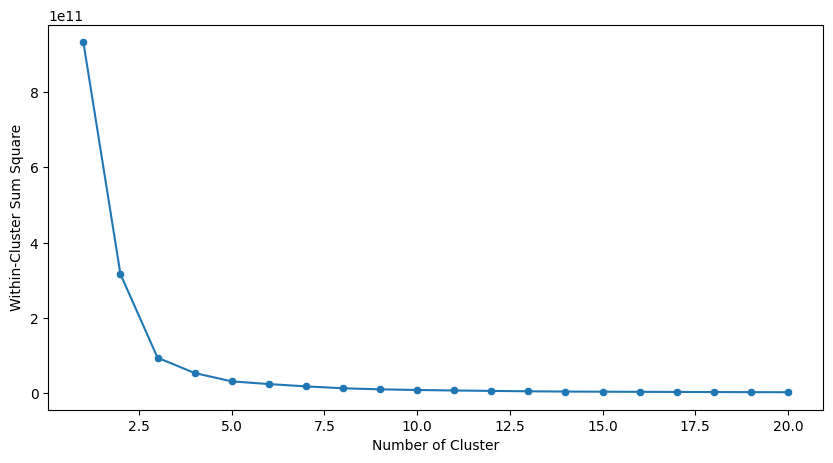

In [ ]:
#Visualisasi grafik elbow

plt.figure(figsize=(10,5))
n = range(1,21)
sns.lineplot(
    x = n,
    y = wcss
)
sns.scatterplot(
    x=n,
    y=wcss
)
plt.xticks = n
plt.xlabel('Number of Cluster')
plt.ylabel('Within-Cluster Sum Square')

ditemukan bahwa jumlah cluster optimal adalah 3, karena penurunan inersia mulai melambat sejak cluster=3.

In [ ]:
#K-Means menggunakan cluster optimal dari Metode Elbow

kmean = KMeans(n_clusters=3)
kmean.fit(X)

data['Cluster'] = kmean.labels_

In [ ]:
#Metode Silhouette

silhouette_scores = []
number_of_cluster = range(2,21)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean'))

1.   number_of_cluster = range(2, 21)range untuk jumlah kluster dari 2 hingga 20.
2.   loop untuk iterasi melalui jumlah kluster yang didefinisikan dalam number_of_cluster.

Text(0, 0.5, 'Silhoutte Score')

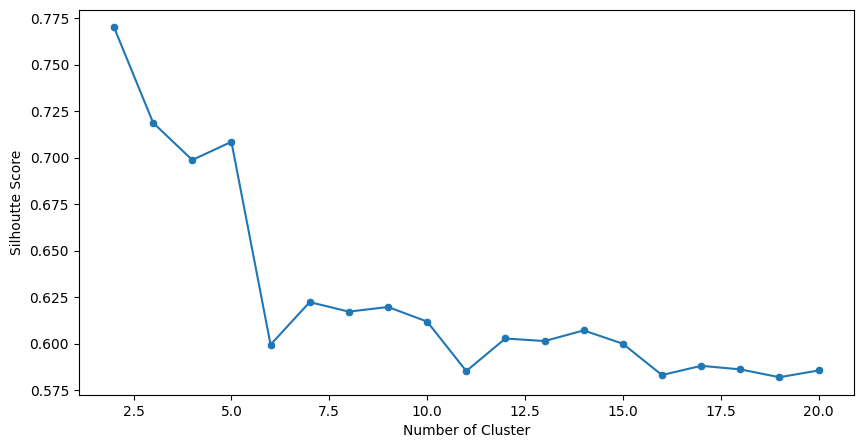

In [ ]:
#Visualisasi grafik silhouette

plt.figure(figsize=(10,5))
sns.lineplot(
    x = range(2,21),
    y = silhouette_scores
)
sns.scatterplot(
    x=range(2,21),
    y=silhouette_scores
)
plt.xticks = range(2,21)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')

ketika menggunakan Metode Silhouette, nilai tertinggi ditemukan pada cluster=2, sehingga itu dianggap sebagai jumlah cluster optimal.

In [ ]:
#K-Means menggunakan cluster optimal dari Metode Silhouette

kmean = KMeans(n_clusters=2)
kmean.fit(X)

data['Cluster'] = kmean.labels_
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,1
656,657,60732,84000,10,1,13,2,1
657,658,53834,145000,8,1,9,1,1
658,659,80655,172000,10,1,15,0,1
